# **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re, string, unicodedata
from string import punctuation
from collections import Counter

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
import tensorflow as tf
import tensorflow 
from tensorflow import keras
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
import nltk
from nltk.corpus import stopwords
import textblob
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [6]:
from sklearn import set_config
set_config(print_changed_only = False)

# **LOADING THE DATASET**

In [7]:
data = pd.read_csv("../input/spam1csv/spam.csv", encoding = "ISO-8859-1", engine = "python")

In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# **ANALYSING THE DATA**

In [10]:
data.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)

In [11]:
data.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

In [12]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.tail()

,target,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [14]:
data.shape

(5572, 2)

In [15]:
data.columns

Index(['target', 'text'], dtype='object')

In [16]:
data.duplicated().sum()

403

In [17]:
data = data.drop_duplicates()

In [18]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [20]:
data.nunique()

target       2
text      5169
dtype: int64

In [21]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [22]:
data['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

# **DATA VISUALIZATION**

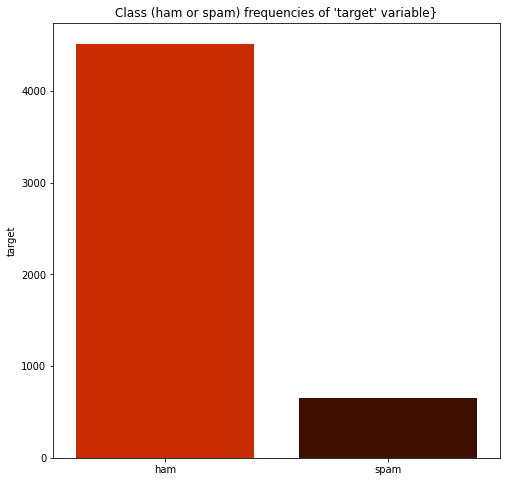

In [23]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "white")
sns.barplot(x = data["target"].value_counts().index,
            y = data["target"].value_counts(), palette = ["#C82C02", "#410F01"],
            saturation = 1).set(title = "Class (ham or spam) frequencies of 'target' variable}");
plt.show()

In [24]:
fig = px.pie(data_frame = data, names = "target", hole = 0.4, title = "counts in 'target' variable", 
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)
fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#410F01")))
fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)
fig.show()

In [25]:
data["ch_no"] = data["text"].apply(len)
data["wd_no"] = data.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
data["sn_no"] = data.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

In [26]:
data.describe().T.style.background_gradient(cmap = "Purples_r")

,count,mean,std,min,25%,50%,75%,max
ch_no,5169.000000,78.977945,58.236293,2.000000,36.000000,60.000000,117.000000,910.000000
wd_no,5169.000000,18.453279,13.324793,1.000000,9.000000,15.000000,26.000000,220.000000
sn_no,5169.000000,1.947185,1.362406,1.000000,1.000000,1.000000,2.000000,28.000000


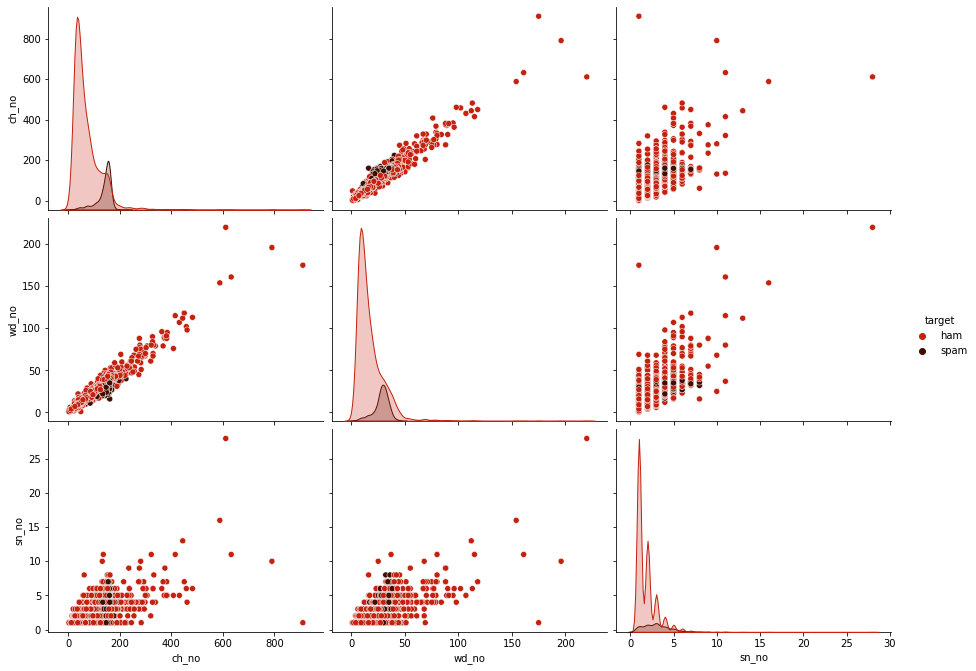

In [27]:
fig = sns.pairplot(data = data, hue = "target", palette = ["#C4210E", "#410F01"], height = 3.15, aspect = 1.35)
plt.show(fig);

**IMPLEMENTING NLP METHODS TO CLEAN THE DATA READY FOR MODEL TRAINING**

In [28]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [29]:
data["text"] = data["text"].str.replace('[^\w\s]','')

In [30]:
data["text"] = data["text"].str.replace('\d','')

In [31]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [32]:
data["text"] = data["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [33]:
data["text"] = data["text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

In [34]:
data["text"] = data["text"].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

In [35]:
data.head()

,target,text,ch_no,wd_no,sn_no
0,ham,jurong point crazy available bugis great world...,111,24,2
1,ham,joking,29,8,2
2,spam,free entry wkly comp final tkts text receive e...,155,37,2
3,ham,early already,49,13,1
4,ham,dont think life around though,61,15,1


In [36]:
data.tail()

,target,text,ch_no,wd_no,sn_no
5567,spam,time tried contact pound prize claim easy call...,161,35,4
5568,ham,going esplanade home,37,9,1
5569,ham,pity mood soany suggestion,57,15,2
5570,ham,bitching acted like interested buying somethin...,125,27,1
5571,ham,rofl true name,26,7,2


In [37]:
corpus = []
for i in data.text:
    for j in i.split():
        corpus.append(j.strip())

In [38]:
counter = Counter(corpus)
common_words = counter.most_common(15)
dict(common_words)

{'call': 509,
 'dont': 258,
 'ltgt': 254,
 'know': 248,
 'free': 245,
 'like': 234,
 'come': 228,
 'time': 224,
 'good': 218,
 'want': 208,
 'text': 197,
 'love': 184,
 'need': 178,
 'send': 165,
 'going': 165}

# **WORDCLOUD VISUALIZATION**

**THE BIGGER FONTS ARE SPAM WORDS(COMMON) AND SMALL FONTS ARE HAM WORDS(UNCOMMON)**

<function matplotlib.pyplot.show(close=None, block=None)>

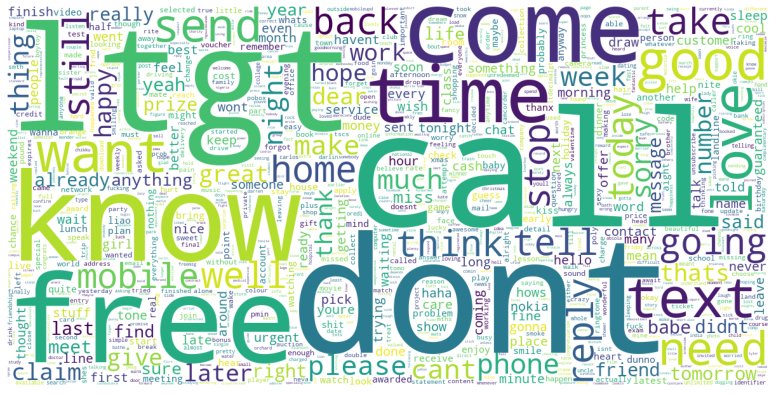

In [39]:
text = " ".join(i for i in data.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

# **DISTRIBUTION PLOTS**

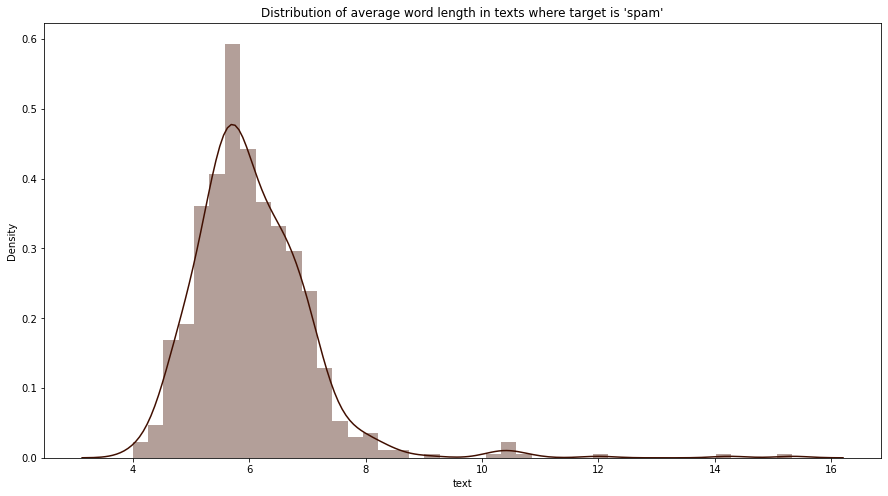

In [40]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = data[data["target"] == "spam"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'spam'");

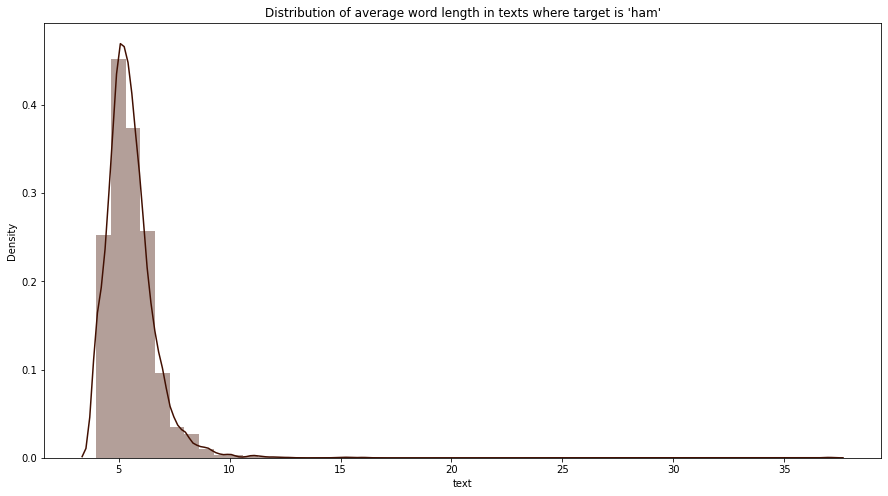

In [41]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = data[data["target"] == "ham"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'ham'");

# **DATA SPLITTING**

In [42]:
lb = LabelEncoder()
data["target"] = lb.fit_transform(data["target"])

In [43]:
x = data["text"]
y = data["target"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

In [44]:
print("The shape of 'train_x' is {} and the shape of 'test_x' is {}".format(train_x.shape[0], test_x.shape[0]))

The shape of 'train_x' is 4135 and the shape of 'test_x' is 1034


In [45]:
from keras_preprocessing.sequence import pad_sequences

# **TOKENIZING AND PADDING**

In [46]:
tokenizer = Tokenizer(num_words = None)
tokenizer.fit_on_texts(train_x)

tokenized_train = tokenizer.texts_to_sequences(train_x)
tokenized_test = tokenizer.texts_to_sequences(test_x)

train_x = tf.keras.preprocessing.sequence.pad_sequences(tokenized_train, maxlen = None)
test_x = tf.keras.preprocessing.sequence.pad_sequences(tokenized_test, maxlen = None)

# **GLOBAL VECTOR (GLOVE) EMBEDDING**

In [47]:
GLOVE_EMBEDDING = "../input/glovetwitter27b100dtxt/glove.twitter.27B.100d.txt"

In [48]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = "float32")
embeddings_index = dict(get_coefs(*g.rstrip().rsplit(" ")) for g in open(GLOVE_EMBEDDING, encoding="utf8"))

#_________________________________________________________________________________________#

#_________________________________________________________________________________________#

embeddings = np.stack(embeddings_index.values())
embedding_mean, embedding_std = embeddings.mean(), embeddings.std()
embedding_size = embeddings.shape[1]

word_index = tokenizer.word_index
nb_words = min(6012, len(word_index))+1

embedding_matrix = embedding_matrix = np.random.normal(embedding_mean, embedding_std, (nb_words, embedding_size))
for word, i in word_index.items():
    if i >= 6012:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [49]:
lr_reduce = ReduceLROnPlateau(monitor = "val_accuracy", patience = 2, factor = 0.5, min_lr = 0.00001)

# **DEEP LEARNING MODEL (LONG SHORT-TERM MEMORY)**

In [50]:
model = Sequential()

model.add(Embedding(6013, output_dim = 100, weights = [embedding_matrix], trainable = False))

model.add(LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3, dropout = 0.5))

model.add(LSTM(units = 64, recurrent_dropout = 0.3, dropout = 0.5))

model.add(Dense(units = 32, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), loss = "binary_crossentropy", metrics = ["accuracy"])

2022-10-30 06:33:15.317776: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         601300    
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 770,069
Trainable params: 168,769
Non-trainable params: 601,300
_________________________________________________________________


In [52]:
history = model.fit(train_x,
                    train_y,
                    batch_size = 64,
                    validation_data = (test_x, test_y),
                    epochs = 20,
                    callbacks = [lr_reduce])

2022-10-30 06:33:15.942978: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
65/65 [==============================] - 51s 677ms/step - loss: 0.1799 - accuracy: 0.9366 - val_loss: 0.1357 - val_accuracy: 0.9594
Epoch 2/20
65/65 [==============================] - 44s 671ms/step - loss: 0.1144 - accuracy: 0.9599 - val_loss: 0.1376 - val_accuracy: 0.9594
Epoch 3/20
65/65 [==============================] - 45s 700ms/step - loss: 0.0851 - accuracy: 0.9717 - val_loss: 0.1497 - val_accuracy: 0.9613
Epoch 4/20
65/65 [==============================] - 48s 747ms/step - loss: 0.0700 - accuracy: 0.9770 - val_loss: 0.1103 - val_accuracy: 0.9681
Epoch 5/20
65/65 [==============================] - 47s 716ms/step - loss: 0.0674 - accuracy: 0.9775 - val_loss: 0.1161 - val_accuracy: 0.9652
Epoch 6/20
65/65 [==============================] - 45s 694ms/step - loss: 0.0632 - accuracy: 0.9797 - val_loss: 0.1528 - val_accuracy: 0.9652
Epoch 7/20
65/65 [==============================] - 45s 698ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.1254 - val_accuracy: 0.9652

In [53]:
print("Model accuracy on the train set: ", model.evaluate(train_x, train_y)[1])
print("Model accuracy on the test set: ", model.evaluate(test_x, test_y)[1])

130/130 [==============================] - 16s 116ms/step - loss: 0.0049 - accuracy: 0.9988
Model accuracy on the train set:  0.9987908005714417
33/33 [==============================] - 3s 101ms/step - loss: 0.1522 - accuracy: 0.9729
Model accuracy on the test set:  0.9729207158088684


# **VISUALIZING MODEL PERCENTAGE**

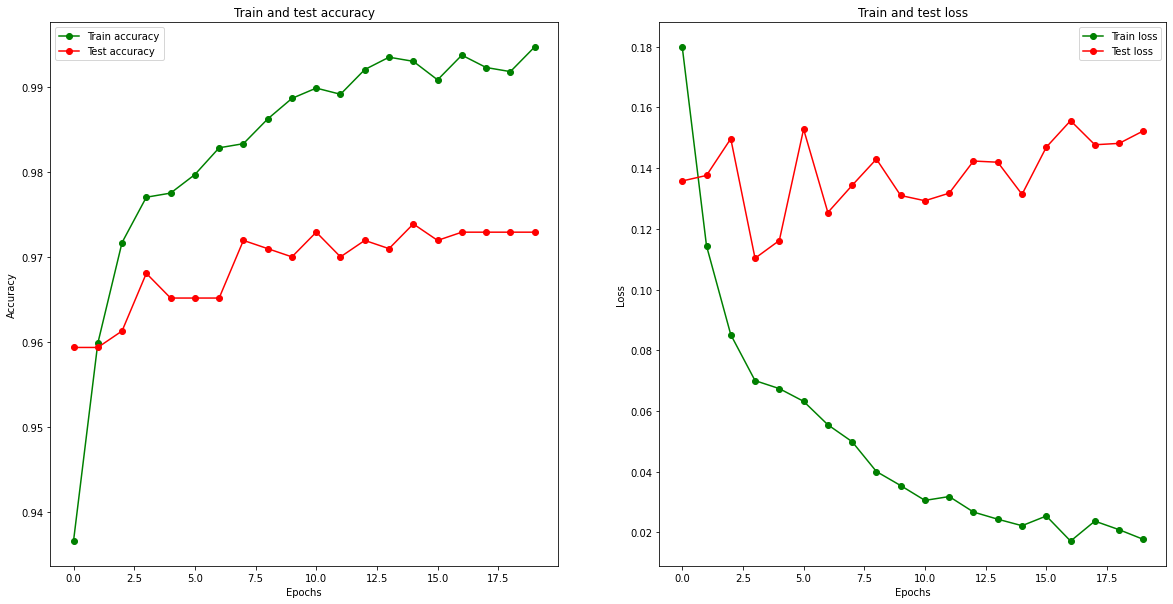

In [54]:
epochs = [i for i in range(20)]

fig, ax = plt.subplots(1, 2)
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, "go-", label = "Train accuracy")
ax[0].plot(epochs, val_acc, "ro-", label = "Test accuracy")
ax[0].set_title("Train and test accuracy")
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, "go-", label = "Train loss")
ax[1].plot(epochs, val_loss, "ro-", label = "Test loss")
ax[1].set_title("Train and test loss")
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

# **CLASSIFICATION REPORT**

In [55]:
prediction = model.predict(test_x)
classes_pred = np.argmax(prediction, axis = 1)

print(classification_report(test_y, classes_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       896
           1       0.00      0.00      0.00       138

    accuracy                           0.87      1034
   macro avg       0.43      0.50      0.46      1034
weighted avg       0.75      0.87      0.80      1034



# **CONFUSION MATRIX**

[[896   0]
 [138   0]]


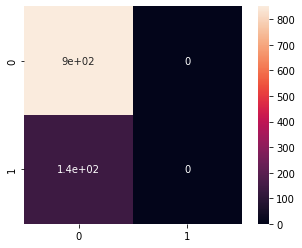

In [56]:
conf_mat = confusion_matrix(test_y, classes_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()